# 时域数据特征值计算归档

This document includes formulas of some common measures (features) we use to interpret tzone data, implements computations of these measures, and runs these implementations on a dataset we create for demonstration purposes. 

## Formulas

Here are the formulas of common measures for data $x = [x_i]$ where $1 \leq i \leq N$: 

$\textbf{Center}$

$\overline{x} = \frac{1}{N} \sum_{i = 1}^{N} x_i$ (mean)

$avr(x) = \frac{1}{N} \sum_{i = 1}^{N} |x_i|$ (mean magnitude)

$rms(x) = \sqrt{\frac{1}{N} \sum_{i = 1}^{N} x_i^2}$ (root-mean-square measure)

$\textbf{Spread}$

$max(x) = x_i, \forall j \in [1, N], x_i \geq x_j$ (maximum)

$min(x) = x_i, \forall j \in [1, N], x_i \leq x_j$ (minimum)

$pk(x) = max(x) - min(x)$ (peak to peak value)

$margin(x) = \frac{pk(x)}{xr(x)}$, where $xr(x) = (\frac{1}{N} \sum_{i = 1}^{N} \sqrt{|x_i|})^2$

$var(x) = \frac{N}{N-1} v_1$, where $v_1 = \frac{1}{N} \sum_{i = 1}^{N} (x_i - \overline{x})^2$ (unbiased estimate of variance)

$std(x) = \sqrt{var(x)}$ (unbiased estimate of standard deviation)

$\textbf{Shape}$

$kurtosis(x) = \frac{k_4}{v_1^2}$, $k_4 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \overline{x})^4$ (estimate of kurtosis where bias is not corrected)

$skewness(x) = \frac{s_3}{v_1^{1.5}}$, $s_3 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \overline{x})^3$ (estimate of skewness where bias is not corrected)

## Demo

For demonstration purposes, a (virtual) tzone dataset is created and plotted. 

In [1]:
# import stuff
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# tzone dataset
# setting parameters
N = 1600
FS = 4000
x = np.zeros(N)
for i in range(N):
    val = np.float64(np.pi)*2*i/FS
    x[i] = 10+7*np.sin(180*val)+2.8*np.sin(390*val)+5.1*np.sin(600*val)

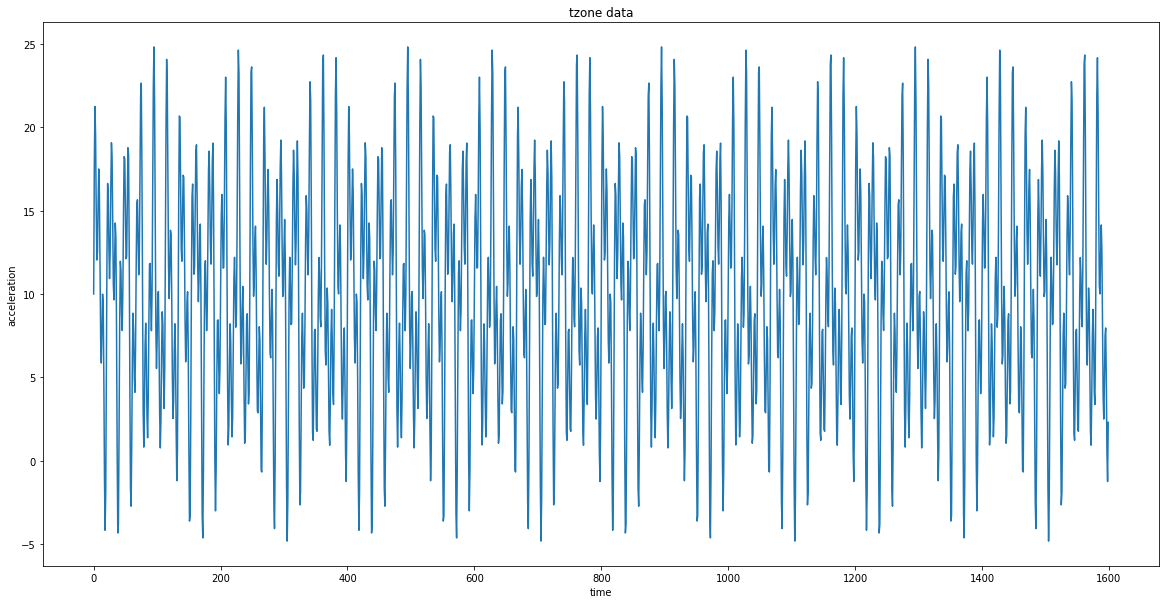

In [3]:
# plot data
plt.figure(figsize=(20, 10))
plt.title("tzone data")
plt.xlabel("time")
plt.ylabel("acceleration")
plt.plot(range(N), x)

Values of these measures are then computed and shown in the plot. We will start with a visualization of the center measures:

In [4]:
# center
mean = np.mean(x)
print("mean(x):", mean)
avr = np.mean(np.absolute(x))
print("avr(x):", avr)
rms = np.sqrt(np.mean(x**2))
print("rms:", rms)

mean(x): 10.000000000000002
avr(x): 10.307333835320287
rms: 11.892224350389625


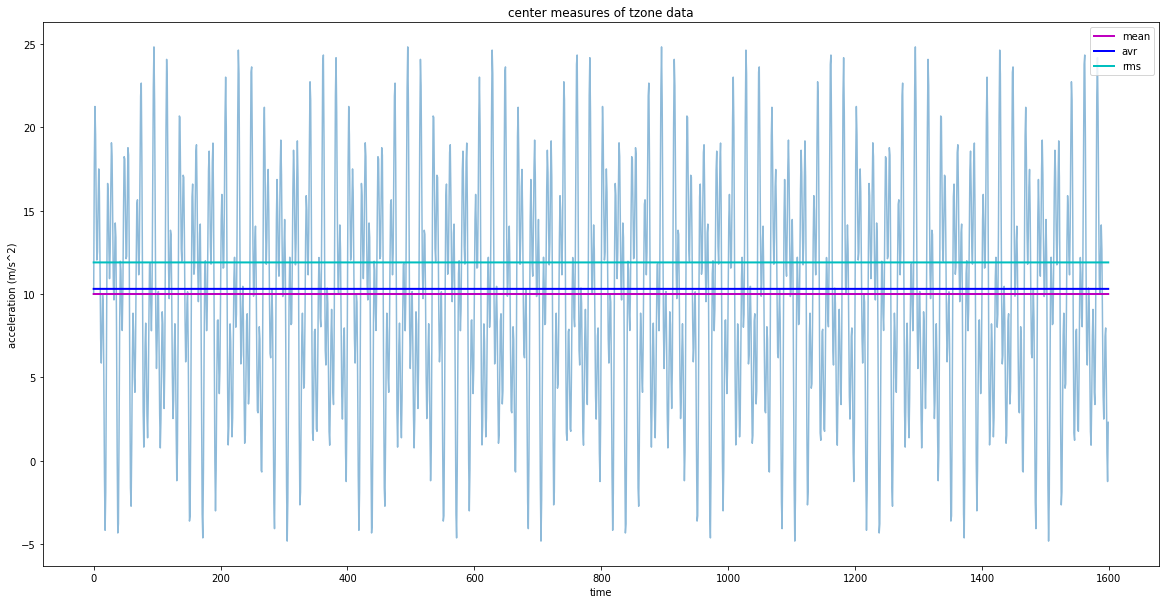

In [5]:
# plot for center
plt.figure(figsize=(20, 10))
plt.title("center measures of tzone data")
plt.xlabel("time")
plt.ylabel("acceleration (m/s^2)")
plt.plot(range(N), x, alpha=0.5)
plt.plot(range(N), mean*np.ones(N), "m-", linewidth=2, label="mean")
plt.plot(range(N), avr*np.ones(N), "b-", linewidth=2, label="avr")
plt.plot(range(N), rms*np.ones(N), "c-", linewidth=2, label="rms")
plt.legend(loc="upper right")

We will then look at the spread of this dataset:

In [6]:
# spread
ma = np.max(x)
print("max(x):", ma)
mi = np.min(x)
print("min(x):", mi)
pkpk = ma-mi
print("pk-pk(x):", pkpk)

def m(x):
    # margin
    pk = np.max(x)-np.min(x)
    xr = np.power(np.mean(np.sqrt(np.absolute(x))), 2)
    return pk/xr
mar = m(x)
print("margin(x):", mar)

var = np.var(x, ddof=1)
print("var:", var)
std = np.std(x, ddof=1)
print("std:", std)

max(x): 24.805186918618737
min(x): -4.805186918618713
pk-pk(x): 29.61037383723745
margin(x): 3.1966878490413677
var: 41.4509068167604
std: 6.438237865810831


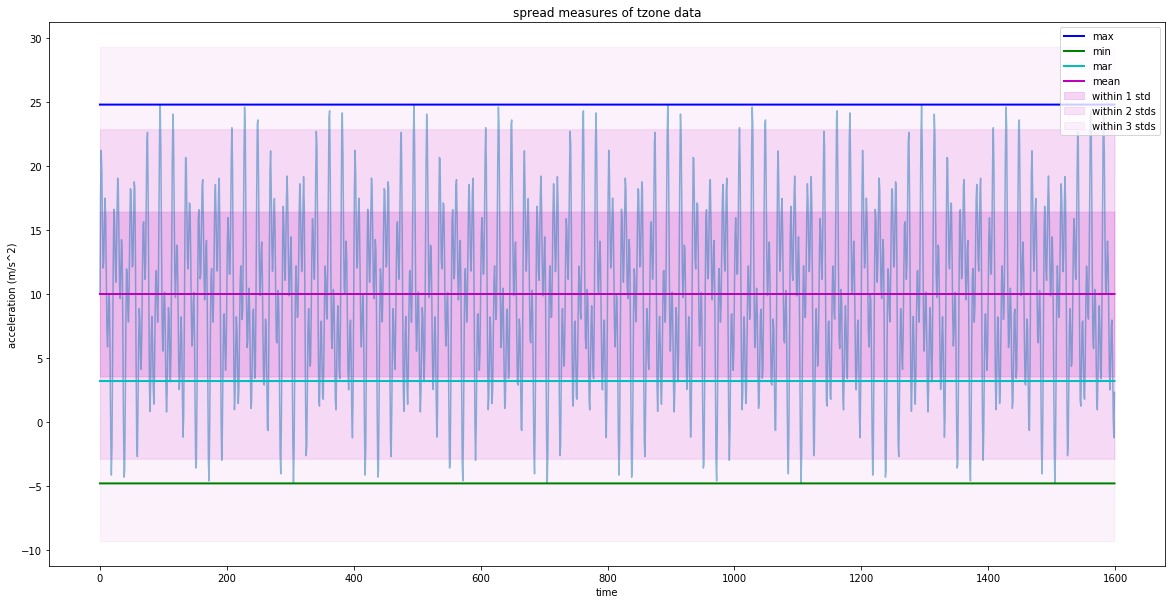

In [10]:
# plot for spread
plt.figure(figsize=(20, 10))
plt.title("spread measures of tzone data")
plt.xlabel("time")
plt.ylabel("acceleration (m/s^2)")
plt.plot(range(N), x, alpha=0.5)
plt.plot(range(N), ma*np.ones(N), "b-", linewidth=2, label="max")
plt.plot(range(N), mi*np.ones(N), "g-", linewidth=2, label="min")
plt.plot(range(N), mar*np.ones(N), "c-", linewidth=2, label="mar")
plt.plot(range(N), mean*np.ones(N), "m-", linewidth=2, label="mean")
plt.fill_between(range(N), mean-std, mean+std, color="m", alpha=0.15, label="within 1 std")
plt.fill_between(range(N), mean-2*std, mean+2*std, color="m", alpha=0.1, label="within 2 stds")
plt.fill_between(range(N), mean-3*std, mean+3*std, color="m", alpha=0.05, label="within 3 stds")
plt.legend(loc="upper right")

Finally we compute the shape measures of this dataset:

In [13]:
# shape
def k(x):
    # kurtosis
    # no correct for bias
    mean = np.mean(x)
    k4 = np.mean((x - mean)**4)
    k2 = np.mean((x - mean)**2)
    k1 = k4/k2**2
    return k1
def s(x):
    # skewness
    # no correct for bias
    mean = np.mean(x)
    s3 = np.mean((x - mean)**3)
    s2 = np.mean((x - mean)**2)
    s1 = s3/(s2**1.5)
    return s1
print("kurtosis:", k(x))
print("skewness:", s(x))

kurtosis: 2.558698063736479
skewness: 7.206146971235599e-16
